# **Project**    - Restaurant Data Analysis At Cognifyz Technologies

##### **Project Type**    - Explanatory Data Analysis
##### **Industry**    - Cognifyz Technologies
##### **Name -** Diana Auma
##### **Level -** 1

# **Project Summary**

**Task 1 : Data Exploration and Preprocessing**

Task 1 of the Cognifyz Data Science Intern Restaurant project, the main objective is to explore the dataset, conduct data preprocessing tasks, and perform initial analyses to gain insights into the restaurant data. This level involves understanding the structure of the dataset, handling missing values, performing data type conversions, and analyzing the distribution of the target variable, "Aggregate rating," to identify any class imbalances.

**Task 2: Descriptive Analysis**

Calculate basic statistical measures such as mean, median, and standard deviation for numerical columns to understand their central tendencies and variability.

Explore the distribution of categorical variables like "Country Code," "City," and "Cuisines" to identify patterns and commonalities.

Identify the top cuisines and cities with the highest number of restaurants to understand the diversity and concentration of dining options.

**Task 3: Geospatial Analysis**

Visualize restaurant locations on a map using latitude and longitude information to gain insights into their geographical distribution.

Analyze the distribution of restaurants across different cities or countries to identify hotspots and regions with high restaurant density.

Determine if there is any correlation between the restaurant's location and its rating to explore potential spatial patterns in customer preferences.

**Key Activities:**

**Dataset Exploration:**

Identify the number of rows and columns in the dataset.

Check for missing values in each column and handle them appropriately.

Perform data type conversion if necessary to ensure consistency and compatibility.

**Analyze Target Variable:**

Analyze the distribution of the target variable, "Aggregate rating," to understand its range and variability.

Identify any class imbalances that may affect model performance and devise strategies to address them.

**Descriptive Analysis:**

Calculate statistical measures for numerical columns to summarize their characteristics.

Explore the distribution of categorical variables to uncover trends and patterns in restaurant data.

**Geospatial Analysis:**

Visualize restaurant locations on a map to visualize their spatial distribution.

Analyze the relationship between restaurant location and rating to uncover any spatial dependencies.

**Expected Outputs:**

Summary statistics for numerical columns.

Visualization of categorical variables' distributions.

Identification of top cuisines and cities with the highest restaurant counts.

Geospatial visualization of restaurant locations and their correlation with ratings.

**GitHub Link:** [Restaurant EDA](https://github.com/auma23/Cognifyz-Technologies-Intern/blob/main/Cognifyz_Technology_Data_Science_Intern_Level1.ipynb)

### **Task 1 : Data Exploration and Preprocessing**

In [79]:

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore all warnings
import warnings

warnings.filterwarnings('ignore')


In [80]:
#import the dataset
df = pd.read_csv("/content/Dataset .csv")

In [81]:
#print 5 rows of the dataset
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [82]:
#check number of rows and columns
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 9551
Number of columns: 21


In [83]:
#check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)


Missing values in each column:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [84]:
# replace the missing cuisines with the most common cuisine
most_common_cuisine = df['Cuisines'].mode()[0]
df['Cuisines'].fillna(most_common_cuisine, inplace=True)

In [85]:
# checking data types of our dataset
column_data_types = df.dtypes
print(column_data_types)

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [86]:
#analyse the distribution of the target variable ("Aggregate rating")
rating_dist = df['Aggregate rating'].value_counts().sort_index(ascending=False)
print("\nDistribution of Aggregate rating (Highest to Lowest):\n", rating_dist)


Distribution of Aggregate rating (Highest to Lowest):
 4.9      61
4.8      25
4.7      42
4.6      78
4.5      95
4.4     144
4.3     174
4.2     221
4.1     274
4.0     266
3.9     335
3.8     400
3.7     427
3.6     458
3.5     480
3.4     498
3.3     483
3.2     522
3.1     519
3.0     468
2.9     381
2.8     315
2.7     250
2.6     191
2.5     110
2.4      87
2.3      47
2.2      27
2.1      15
2.0       7
1.9       2
1.8       1
0.0    2148
Name: Aggregate rating, dtype: int64


In [87]:
#identify class imbalances
class_imbalance = df['Aggregate rating'].value_counts(normalize=True).sort_index(ascending=False)
print("\nClass imbalance:\n", class_imbalance)


Class imbalance:
 4.9    0.006387
4.8    0.002618
4.7    0.004397
4.6    0.008167
4.5    0.009947
4.4    0.015077
4.3    0.018218
4.2    0.023139
4.1    0.028688
4.0    0.027850
3.9    0.035075
3.8    0.041880
3.7    0.044707
3.6    0.047953
3.5    0.050257
3.4    0.052141
3.3    0.050571
3.2    0.054654
3.1    0.054340
3.0    0.049000
2.9    0.039891
2.8    0.032981
2.7    0.026175
2.6    0.019998
2.5    0.011517
2.4    0.009109
2.3    0.004921
2.2    0.002827
2.1    0.001571
2.0    0.000733
1.9    0.000209
1.8    0.000105
0.0    0.224898
Name: Aggregate rating, dtype: float64


### **Task 2: Descriptive Analysis**

In [88]:
# Descriptive statistics for numerical columns
numerical_stats = df.describe()
print("Descriptive Statistics for Numerical Columns:")
print(numerical_stats)

Descriptive Statistics for Numerical Columns:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25

In [89]:
#categorical columns
categorical_columns = ['Country Code', 'City', 'Cuisines']

In [90]:
#distribution of categorical variables
for column in categorical_columns:
    value_counts = df[column].value_counts()
    print(f"\nDistribution of {column}:")
    print(value_counts)


Distribution of Country Code:
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

Distribution of City:
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

Distribution of Cuisines:
North Indian                                             945
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food         

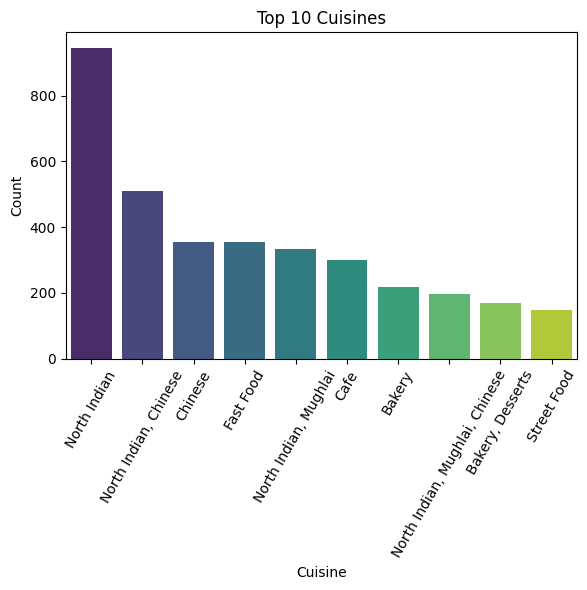

In [91]:
# Limit the number of unique cuisines to the top 10

top_cuisines = df['Cuisines'].value_counts().head(10)

# Create the plot for the top 10 cuisines
plt.figure(figsize=(6, 6))
sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='viridis')
plt.title("Top 10 Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


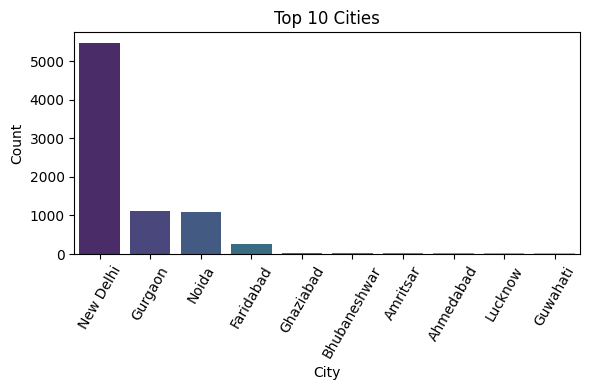

In [92]:
# Limit the number of unique cities to the top 10
top_cities = df['City'].value_counts().head(10)

# Create the plot for the top 10 cities
plt.figure(figsize=(6, 4))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title("Top 10 Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


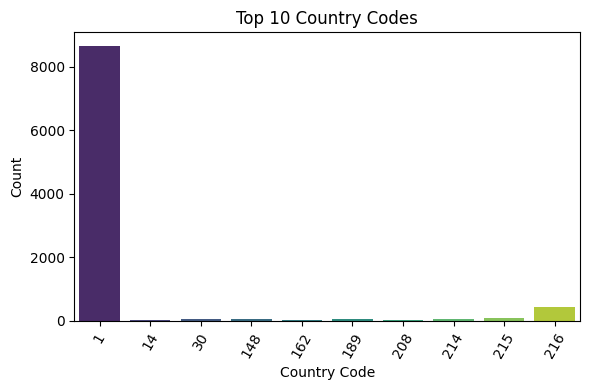

In [93]:
# Limit the number of unique country codes to the top 10
top_country_codes = df['Country Code'].value_counts().head(10)

# Create the plot for the top 10 country codes
plt.figure(figsize=(6, 4))
sns.barplot(x=top_country_codes.index, y=top_country_codes.values, palette='viridis')
plt.title("Top 10 Country Codes")
plt.xlabel("Country Code")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()



### **Task3: Geospatial Analysis**

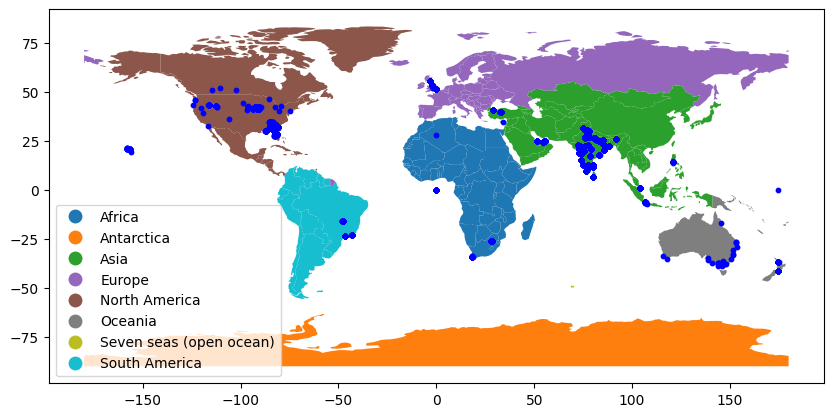

In [94]:
# Locations of restaurants on a map using latitude and longitude information
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

map = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude)
)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

map.plot(ax=world.plot("continent", legend = True, figsize=(10, 8)), marker='o', color='blue', markersize=10)

plt.show()

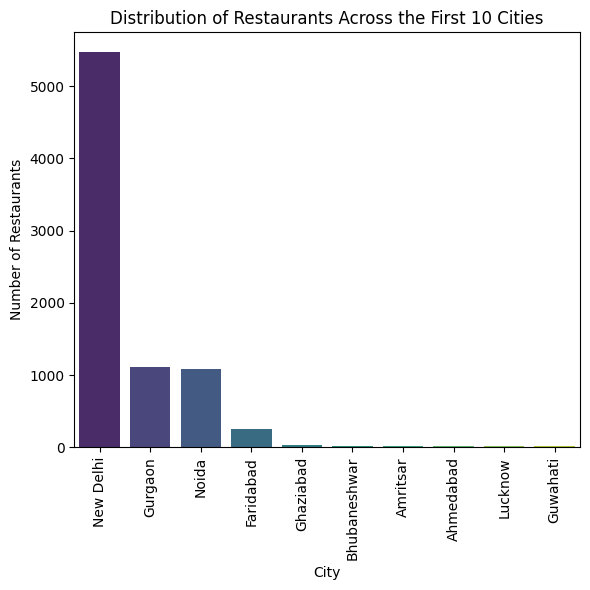

In [95]:
# The distribution of restaurants across different cities or countries limited to top 10
city_counts = df['City'].value_counts().head(10)

plt.figure(figsize=(6, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title("Distribution of Restaurants Across the First 10 Cities")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Correlation Matrix:
                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


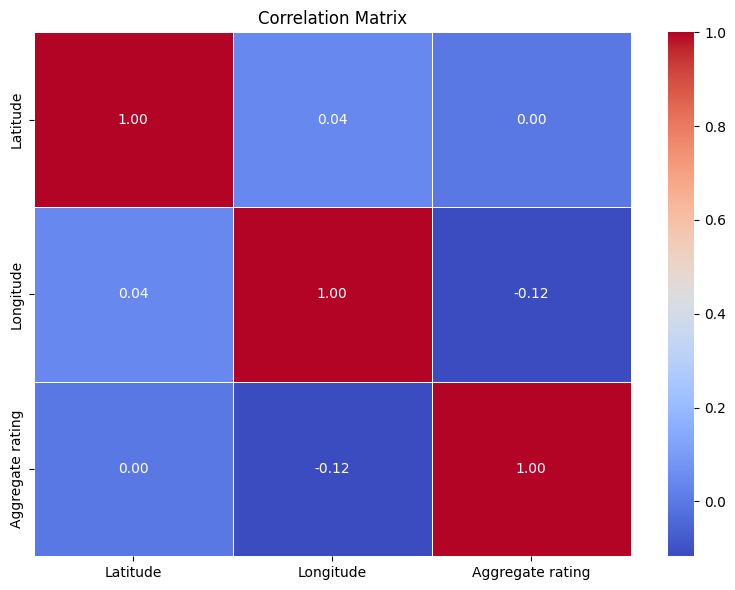

In [96]:
#Determine correlation between the restaurant's location and ratings
correlation = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print("Correlation Matrix:")
print(correlation)

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## **Project Findings:**
#### **Task 1:**
Checking Dataset columns and data types which include restaurants, cities, locations, ratings, votes etc.

There are 9551 rows and 21 columns provided in the data.

Cusines has 9 missing values and no duplicates.

Data type conversion is not neccessary since Agregate rating is a float are required.

"Aggregate rating" is imbalanced because the 0.0 rating has the majority of the ratings. We are not sure if the 2148 restaurants were rated 0.0 or they were not rated hence it is advisable to drop the 0.0 rows in our final model building.

#### **Task 2:**
Values for count, mean, std diviation, minimum, maximum accross all columns

Identified categorical variables such as cuisines, cities and country code calculating how they are distributed

Most cuisines are North Indian and Chinese from the bar plot.

New Delhi, Gurgaon and Noida cirties have the highest number of restaurants as shown from the bar plot.

Most contry codes are 1 and 216.

#### **Task 3:**
North America, Asia and Oceania have many restaurants looking at the map.

New Delhi has many restaurants as seen from the bar plot.

Longitude and Agregate rating are negatively correlated. Zero corellation between lattitude and Agregate rating.

## **Conclusion**

Level 1 data exploration revealed 9 missing values in the 'Cuisines' column, but no duplicates. Imbalances in the 'Aggregate rating' were identified, requiring further investigation. Descriptive analysis revealed numeric columns, while categorical variables revealed patterns like North Indian and Chinese cuisine prevalence and restaurant concentration in cities. Geospatial analysis revealed regional restaurant clusters.
